# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('SUN_train_data.csv')
dataset_train['Price'] = dataset_train['Price'].str.replace(',', '').astype(float)
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 80 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(80, 2471):
    X_train.append(training_set_scaled[i-80:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\Shekhar Singh\onedrive\desktop\ml\function\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a sixth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 167ms/step - loss: 0.0399
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - loss: 0.0055
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.0057
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - loss: 0.0040
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0038
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - loss: 0.0033
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 0.0032
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 0.0037
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0032
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - loss: 0.0025
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0027
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.0023
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0021
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 0.0023
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2024

In [18]:
dataset_test = pd.read_csv('SUN_test_data.csv')
dataset_test['Price'] = dataset_test['Price'].str.replace(',', '').astype(float)
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2024

In [19]:
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(80, 142):
    X_test.append(inputs[i-80:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


### Visualising the results

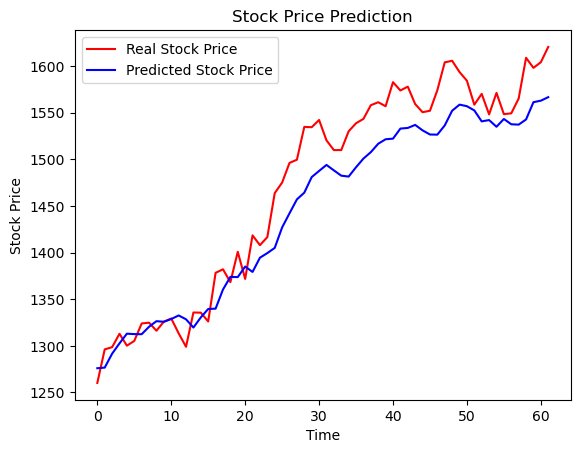

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [21]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [22]:
rmse

35.315576787821435